In [1]:
#%%writefile argo.py
from ftplib import FTP

ifile = 'D20181002_prof_2.nc'

host = 'ftp.ifremer.fr'
ftp = FTP(host)
ftp.login()  
ftp.cwd('ifremer/argo/latest_data')

filenames = ftp.nlst()  # get all avail files in list
print(filenames[:5])

testf = filenames[3]
try:
    localfile = open(testf, 'wb')
    ftp.retrbinary('RETR ' + testf, localfile.write, 1024)
    print('{} file was successfully downloaded'.format(testf))

finally:
    ftp.quit()
    localfile.close()

['D20180717_prof_0.nc', 'D20180718_prof_0.nc', 'D20180718_prof_1.nc', 'D20180721_prof_0.nc', 'D20180725_prof_0.nc']
D20180721_prof_0.nc file was successfully downloaded


### [Сайт проекта "ARGO"](http://www.argo.ucsd.edu/Argo_data_and.html)

### [ftp сайт с данными ARGO](ftp://ftp.ifremer.fr/ifremer/argo/latest_data)

### [Oceanpython](https://oceanpython.org/)

In [2]:
#http://www.argo.ucsd.edu/Argo_data_and.html
#ftp://ftp.ifremer.fr/ifremer/argo/latest_data/

import os
import netCDF4 as nc

# Часть первая: скачиваем данные с ftp
url = r'ftp://ftp.ifremer.fr/ifremer/argo/latest_data/'

lst = os.listdir(os.getcwd())
filebox = list(filter(lambda s: '.nc' in s, lst))
print(filebox)
f = filebox[0]
# Файл f лежит в той же папке, что и ipynb
ncf = nc.Dataset(f, 'r+')
##ivars = ncf.variables
#print(ivars)
tempInfo = ncf.variables['TEMP']
temp = ncf.variables['TEMP'][:]
pres = ncf.variables['PRES'][:]
psal = ncf.variables['PSAL'][:]
lat = ncf.variables['LATITUDE'][:]
lon = ncf.variables['LONGITUDE'][:]
print(temp.shape)
print(tempInfo)
ncf.close()

['D20180721_prof_0.nc']
(470, 1024)
<class 'netCDF4._netCDF4.Variable'>
float32 TEMP(N_PROF, N_LEVELS)
    long_name: Sea temperature in-situ ITS-90 scale
    standard_name: sea_water_temperature
    _FillValue: 99999.0
    units: degree_Celsius
    valid_min: -2.5
    valid_max: 40.0
    C_format: %9.3f
    FORTRAN_format: F9.3
    resolution: 0.001
unlimited dimensions: 
current shape = (470, 1024)
filling on


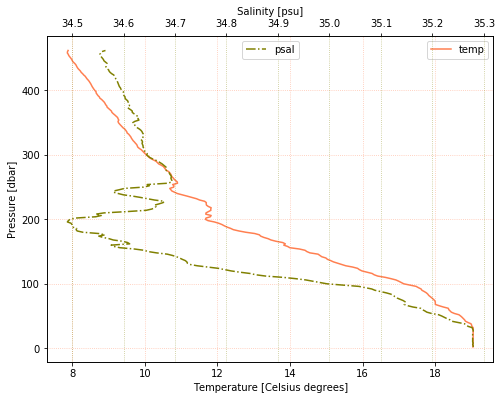

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
"""
       ===============   =============
        Location String   Location Code
        ===============   =============
        'best'            0
        'upper right'     1
        'upper left'      2
        'lower left'      3
        'lower right'     4
        'right'           5
        'center left'     6
        'center right'    7
        'lower center'    8
        'upper center'    9
        'center'          10
"""
x1 = temp[10, :]
x2 = temp[100, :]

y1 = psal[10, :]
z1 = pres[100, :]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.invert_yaxis()   # переворачиваем ось
ax.plot(x1, z1, color='coral', ls='-', label='temp')
ax.grid(color='coral', alpha=0.5, ls=':')
ax.set_ylabel('Pressure [dbar]')
ax.set_xlabel('Temperature [Celsius degrees]')
ax.legend(loc=1)

ax2 = ax.twiny()
ax2.invert_yaxis()
ax2.plot(y1, z1, color='olive', ls='-.', label='psal')
ax2.grid(color='olive', alpha=0.5, ls=':')
#ax2.set_ylabel('Celsius degrees')
ax2.set_xlabel(' Salinity [psu] ')
ax2.legend(loc=9)

plt.show()

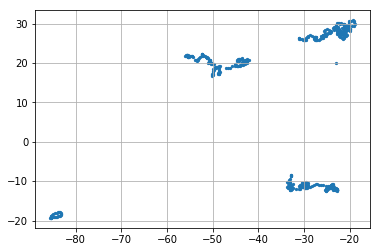

In [4]:
import matplotlib.pyplot as plt

#plt.scatter(lon, lat, s=temp[:, 0]*10., c='b')
plt.scatter(lon, lat, s=5) #, temp[:, 100], c='r')
#plt.scatter(lon, lat) #, temp[:, 200]*10., c='g')

plt.grid()
plt.show()

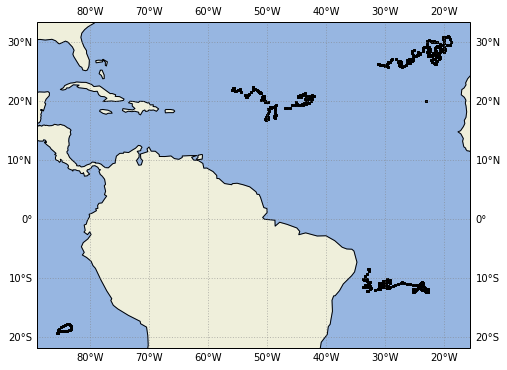

In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#ax.set_extent([-60, -30, 30, 60], crs=ccrs.PlateCarree())
ax.scatter(lon, lat, s=3, c='k', marker='s')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)

#some decoration to see where we are
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=1., color='gray', alpha=0.5, linestyle=':')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER  

fig.savefig('argo_test_map.png', dpi=200, bbox_inches='tight')